# Imports

In [1]:
%matplotlib widget
import inspect
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy.linalg import norm as norm

## Plotting functions

In [2]:
def print_echo(expr_list):
    outer_locals = inspect.currentframe().f_back.f_locals

    for expr in expr_list:
        result = eval(expr, globals(), outer_locals)
        print(expr, '=>', result, type(result))


In [3]:
def plot_vector(ax,v,o=None,color='b'):
    if o is None:
        o=np.array([0,0,0])
    d = o+v
    x=[o[0],d[0]]
    y=[o[1],d[1]]
    z=[o[2],d[2]]
    ax.plot3D(x,y,z,color)


In [4]:
def plot_plane(ax,n,d,color='b',alpha=0.2):
    #dot(n,x)+d=0
    
    xx, yy = np.meshgrid(range(10), range(10))

    # calculate corresponding z
    z = (-n[0] * xx - n[1] * yy - d) * 1. /n[2]

    # plot the surface
    ax.plot_surface(xx, yy, z, color=color)

In [5]:
def plot_plane_p(ax,n,p,color='b',alpha=0.2):
    #dot(n,(x-P))=0
    
    v0 = np.cross(n,np.array([1,0,0]))
    v0=v0/np.linalg.norm(v0)

    v1 = np.cross(n,v0)
    v1=v1/np.linalg.norm(v1)

    jj, kk = np.meshgrid(range(-5,5), range(-5,5))
    
    x = v0[0]*jj + v1[0]*kk + p[0]
    y = v0[1]*jj + v1[1]*kk + p[1]
    z = v0[2]*jj + v1[2]*kk + p[2]

    # plot the surface
    ax.plot_wireframe(x, y, z, color=color, alpha=alpha)
    ax.plot_surface(x, y, z, color=color, alpha=alpha)

# Exercise 3

In [6]:
def vangle(a,b):
    '''Returns the angle between two vectors (degrees)'''
    cosa = np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return np.degrees(np.arccos(cosa))

In [7]:
# Random vector a
a = np.array([2,0,0])
# Vector b that is 60deg to a
b = np.array([2*np.sin(np.radians(30)), 2*np.cos(np.radians(30)), 0])
b = b/norm(b)
print_echo(["vangle(a,b)","norm(np.cross((2*a+b),(a-2*b)))","5*np.sqrt(3)"])

vangle(a,b) => 60.00000000000001 <class 'numpy.float64'>
norm(np.cross((2*a+b),(a-2*b))) => 8.660254037844387 <class 'numpy.float64'>
5*np.sqrt(3) => 8.660254037844386 <class 'numpy.float64'>


# Exercise 2

In [13]:
# Plane E
ne=np.array([1,4,8])
de=50

# Plane F
nf=np.array([3,4,12])
df=82

# Bisector normals
nb0 = ne/norm(ne) + nf/norm(nf)
nb1 = ne/norm(ne) - nf/norm(nf)
# Give same magnitude as manual calculation
nb0=nb0/nb0[0]*10 
nb1=nb1/nb1[0]*-7

[nb0,nb1]

[array([10., 22., 53.]), array([-7.,  8., -2.])]

In [9]:
P=np.array([0,7/2,-8])

#Verify
[np.dot(ne,P)+de, np.dot(nf,P)+df]


[0.0, 0.0]

In [10]:
# Distance parameters for bisector plane
db0=347
db1=-44

# Verify
[np.dot(nb0,P)+db0, np.dot(nb1,P)+db1]

[0.0, 2.842170943040401e-14]

In [16]:
vectors_all = [ne/norm(ne), nf/norm(nf), -ne/norm(ne),-nf/norm(nf),nb0/norm(nb0),nb1/norm(nb1)]
colors=['b','b','b','b','g','r']

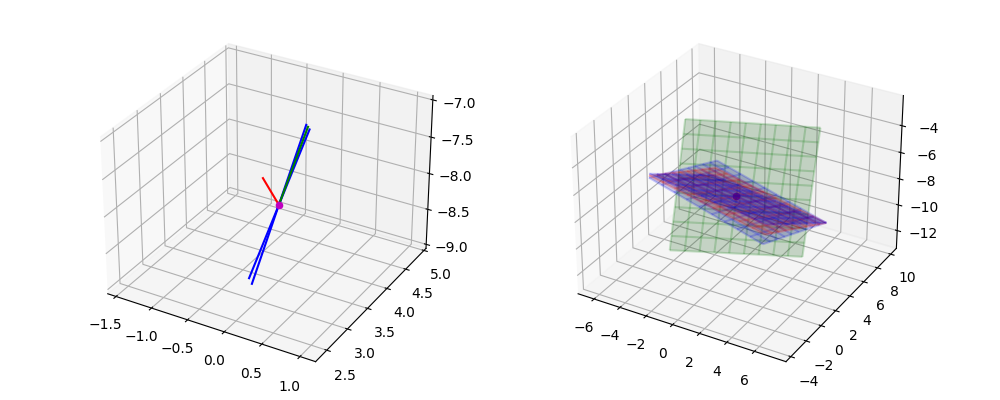

In [22]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121, projection='3d')

ax.scatter(P[0],P[1],P[2],color='m')
for v,color in zip(vectors_all,colors):
    plot_vector(ax,v,o=P,color=color)
ax.axis('equal')

ax = fig.add_subplot(122, projection='3d')
ax.scatter(P[0],P[1],P[2],color='m')
plot_plane_p(ax, ne, P)
plot_plane_p(ax, nf, P)
plot_plane_p(ax, nb0,P,color='r' )
plot_plane_p(ax, nb1,P,color='g' )
ax.axis('equal')

fig.tight_layout()
plt.show()
